В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

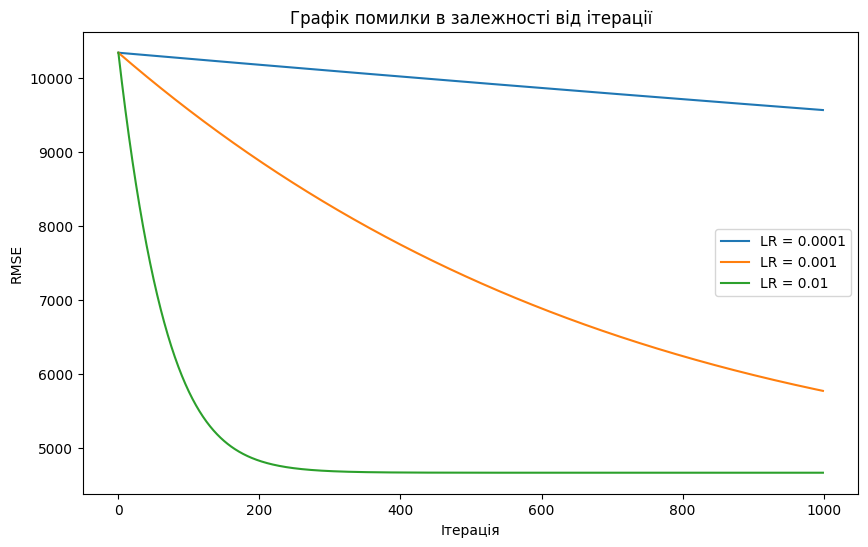

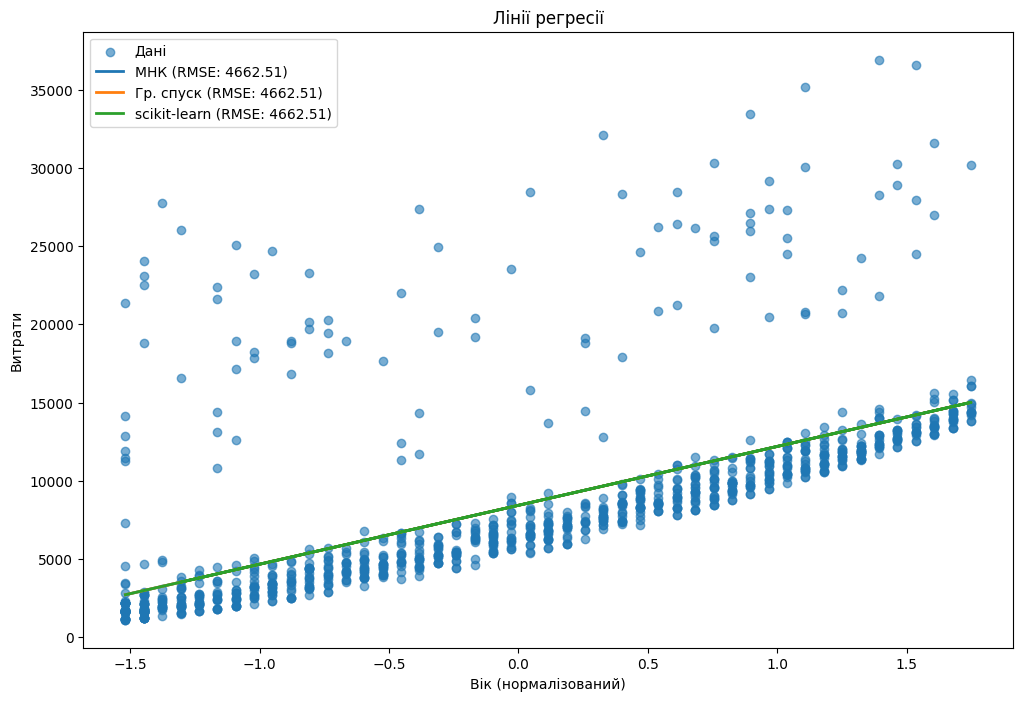

Коефіцієнти МНК: [8434.26829786 3762.00690845]
RMSE МНК: 4662.505766636395

Коефіцієнти градієнтного спуску: [8433.90417997 3761.84449792]
RMSE градієнтного спуску: 4662.505784029029

Коефіцієнти scikit-learn: [8434.268297856204, 3762.0069084528045]
RMSE scikit-learn: 4662.505766636395


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

X = (X - np.mean(X)) / np.std(X)  # Нормализация X
X_matrix = np.c_[np.ones(X.shape[0]), X]

# 1.1 Метод МНК
coefficients_mnk = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y
predictions_mnk = X_matrix @ coefficients_mnk
rmse_mnk = np.sqrt(mean_squared_error(y, predictions_mnk))

# 1.2 Градієнтний спуск
learning_rates = [0.0001, 0.001, 0.01]
epochs = 1000
best_rmse = float('inf')
best_predictions = None
best_coefficients = None
errors_per_learning_rate = {}

for lr in learning_rates:
    coefficients_gd = np.zeros(X_matrix.shape[1])
    errors = []
    for _ in range(epochs):
        predictions_gd = X_matrix @ coefficients_gd
        residuals = predictions_gd - y
        gradient = (X_matrix.T @ residuals) / len(y)
        coefficients_gd -= lr * gradient
        error = np.sqrt(mean_squared_error(y, predictions_gd))
        if np.any(np.isnan(coefficients_gd)) or np.any(np.isinf(coefficients_gd)):
            break
        errors.append(error)
    if errors and errors[-1] < best_rmse:
        best_rmse = errors[-1]
        best_predictions = predictions_gd.copy()
        best_coefficients = coefficients_gd.copy()
    errors_per_learning_rate[lr] = errors

plt.figure(figsize=(10, 6))
for lr, errors in errors_per_learning_rate.items():
    if errors:
        plt.plot(errors, label=f'LR = {lr}')
plt.xlabel('Ітерація')
plt.ylabel('RMSE')
plt.title('Графік помилки в залежності від ітерації')
plt.legend()
plt.show()

# 1.3 Метод LinearRegression з scikit-learn
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)
predictions_sklearn = model.predict(X.reshape(-1, 1))
coefficients_sklearn = [model.intercept_, model.coef_[0]]
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))

# 1.4 Графік: дані та всі три лінії регресії
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Дані', alpha=0.6)
plt.plot(X, predictions_mnk, label=f'МНК (RMSE: {rmse_mnk:.2f})', linewidth=2)
plt.plot(X, best_predictions, label=f'Гр. спуск (RMSE: {best_rmse:.2f})', linewidth=2)
plt.plot(X, predictions_sklearn, label=f'scikit-learn (RMSE: {rmse_sklearn:.2f})', linewidth=2)
plt.xlabel('Вік (нормалізований)')
plt.ylabel('Витрати')
plt.title('Лінії регресії')
plt.legend()
plt.show()

print("Коефіцієнти МНК:", coefficients_mnk)
print("RMSE МНК:", rmse_mnk)
print("\nКоефіцієнти градієнтного спуску:", best_coefficients)
print("RMSE градієнтного спуску:", best_rmse)
print("\nКоефіцієнти scikit-learn:", coefficients_sklearn)
print("RMSE scikit-learn:", rmse_sklearn)


**Висковки**

Усі три підходи дали майже однакові результати. Також всі три лінії на графіку зійшлися. Це означає, що всі методи корекно реалізовані.

Градієнтний спуск виявився найпрожорлівишим, заповнював мені всю памʼять, тому довелось викручуватись: зменьшувати learning_rate та нормалізувати вік, щоб він був легший.



 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

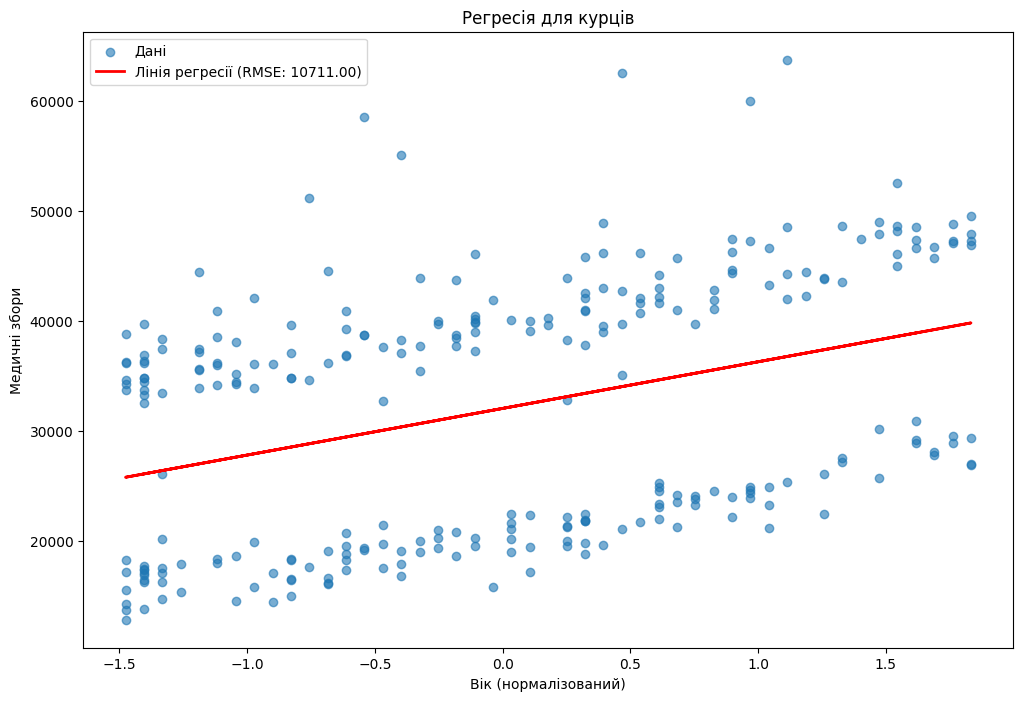

Коефіцієнти для курців: [32050.23183153284, 4242.117444530745]
RMSE для курців: 10711.00334810241


In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

X_smoker = smoker_df['age'].values
y_smoker = smoker_df['charges'].values

X_smoker = (X_smoker - np.mean(X_smoker)) / np.std(X_smoker)

model_smoker = LinearRegression()
model_smoker.fit(X_smoker.reshape(-1, 1), y_smoker)
predictions_smoker = model_smoker.predict(X_smoker.reshape(-1, 1))

rmse_smoker = np.sqrt(mean_squared_error(y_smoker, predictions_smoker))
coefficients_smoker = [model_smoker.intercept_, model_smoker.coef_[0]]

plt.figure(figsize=(12, 8))
plt.scatter(X_smoker, y_smoker, label='Дані', alpha=0.6)
plt.plot(X_smoker, predictions_smoker, label=f'Лінія регресії (RMSE: {rmse_smoker:.2f})', color='red', linewidth=2)
plt.xlabel('Вік (нормалізований)')
plt.ylabel('Медичні збори')
plt.title('Регресія для курців')
plt.legend()
plt.show()

print("Коефіцієнти для курців:", coefficients_smoker)
print("RMSE для курців:", rmse_smoker)


**Висновки**

Вже за графіком бачимо, що лінійна регресія не підходить під аналіз цього випадку. Данні дуже розкидані. Можливо, тут треба окремо обробити "групки" з даними як окремі випадки.
